In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv("MASKEDPPOv2_20e6_logfile.txt", index_col=0)
df.drop(columns=["(%) invalid"], inplace=True)

df2 = pd.read_csv("MASKEDPPOv2_3e6_logfile.txt", index_col=0)
df2.drop(columns=["(%) invalid"], inplace=True)

In [37]:
wins = df.iloc[:,0].values
wins2 = df2.iloc[:,0].values

The simplest form of exponential smoothing is given by the formula:

$$
s_{t}=\alpha x_{t}+(1-\alpha )s_{t-1}=s_{t-1}+\alpha (x_{t}-s_{t-1})
$$

In [38]:
from tqdm import tqdm

s_wins = [None] * len(wins)
alpha=0.001
s_wins[0] = wins[0]
for idx in tqdm(range(1, len(wins))):
    s_wins[idx] = alpha * wins[idx] + (1-alpha)*s_wins[idx-1]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19999/19999 [00:00<00:00, 1672353.08it/s]


In [36]:
from tqdm import tqdm

s_wins2 = [None] * len(wins2)
alpha=0.001
s_wins2[0] = wins2[0]
for idx in tqdm(range(1, len(wins2))):
    s_wins2[idx] = alpha * wins2[idx] + (1-alpha)*s_wins2[idx-1]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19999/19999 [00:00<00:00, 888014.88it/s]


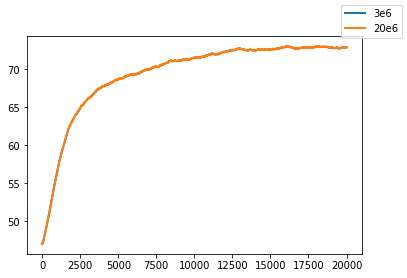

In [34]:
fig, ax = plt.subplots()

ax.plot(s_wins2, lw=2, label="3e6")
ax.plot(s_wins, lw=2, label="20e6")

fig.legend()
plt.show()